<a href="https://colab.research.google.com/github/acewolfag/black/blob/main/FaceNet_PyTourch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition using Facenet and SVM with PCA Visualization

The provided code implements a face recognition system using the [facenet-pytorch](https://www.kaggle.com/datasets/timesler/facenet-pytorch-vggface2) library and training using SVM Model. Here's a summary of the code:

1. Installation: The code installs the facenet-pytorch library from a local file using pip.
2. Model Checkpoints: The code copies the model checkpoints to the torch cache directory for automatic loading during runtime.
3. Importing Required Libraries: Necessary libraries and modules are imported for various functionalities, including image processing, machine learning, face detection, and feature extraction.
4. Helper Functions: Two helper functions are defined. The whitens function normalizes an input image tensor, and the extract_features function detects faces in an image and extracts their feature embeddings.
5. Device Configuration: The code sets the device to either GPU or CPU based on availability.
6. Model Initialization: The MTCNN and Inception ResNet V1 models are initialized with pre-trained weights. The models are moved to the selected device.
7. Dataset Preparation: The code defines the path to the dataset folder and creates ImageFolder datasets for the training and validation sets.
8. Embedding Extraction: The dataset_to_embeddings function is called to extract face embeddings from the training and validation sets.
9. Model Training: The train function is called to train the face recognition model using the extracted embeddings.
10. Model Saving: The trained model is serialized and saved as a pickle file.
11. Model Evaluation: The code generates a classification report and calculates the accuracy of the trained model using the embeddings from the training set.
12. Visualization: The code uses PCA to reduce the dimensionality of the embeddings and plots a 2D scatter plot of the embeddings with different colors representing different labels.
13. Image Testing: Random images from the validation set are selected and their predicted labels are compared with the true labels. The images, along with the predicted and actual labels, are displayed.
14. Single Image Testing: A single image is tested for face recognition, and the predicted label is displayed along with the image.

## Importing Required Libraries

The necessary libraries and modules are imported, including:

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
path_folder = "/kaggle/input/facenet-dataset/Original Images"
# Đường dẫn gốc đến thư mục chứa dữ liệu
source_folder = path_folder
train_folder = "/kaggle/working/train"
val_folder = "/kaggle/working/val"

# Tạo thư mục train và val nếu chưa có
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Lặp qua tất cả các folder (tương ứng với từng class)
for person in os.listdir(source_folder):
    person_path = os.path.join(source_folder, person)

    # Kiểm tra nếu đó là một folder
    if os.path.isdir(person_path):
        # Lấy danh sách các file trong folder person
        images = os.listdir(person_path)

        # Chia dữ liệu theo tỷ lệ train và val
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

        # Tạo thư mục cho class trong train và val
        train_class_folder = os.path.join(train_folder, person)
        val_class_folder = os.path.join(val_folder, person)
        os.makedirs(train_class_folder, exist_ok=True)
        os.makedirs(val_class_folder, exist_ok=True)

        # Di chuyển file vào thư mục tương ứng
        for image in train_images:
            shutil.copy(os.path.join(person_path, image), os.path.join(train_class_folder, image))

        for image in val_images:
            shutil.copy(os.path.join(person_path, image), os.path.join(val_class_folder, image))

        print(f"Đã hoàn thành phân chia cho class {person}")

print("Đã hoàn tất phân chia dữ liệu!")


Đã hoàn thành phân chia cho class Alia Bhatt
Đã hoàn thành phân chia cho class Charlize Theron
Đã hoàn thành phân chia cho class Zac Efron
Đã hoàn thành phân chia cho class Billie Eilish
Đã hoàn thành phân chia cho class Jessica Alba
Đã hoàn thành phân chia cho class Priyanka Chopra
Đã hoàn thành phân chia cho class Natalie Portman
Đã hoàn thành phân chia cho class Hrithik Roshan
Đã hoàn thành phân chia cho class Tom Cruise
Đã hoàn thành phân chia cho class Roger Federer
Đã hoàn thành phân chia cho class Henry Cavill
Đã hoàn thành phân chia cho class Amitabh Bachchan
Đã hoàn thành phân chia cho class Brad Pitt
Đã hoàn thành phân chia cho class Dwayne Johnson
Đã hoàn thành phân chia cho class Kashyap
Đã hoàn thành phân chia cho class Elizabeth Olsen
Đã hoàn thành phân chia cho class Camila Cabello
Đã hoàn thành phân chia cho class Vijay Deverakonda
Đã hoàn thành phân chia cho class Courtney Cox
Đã hoàn thành phân chia cho class Ellen Degeneres
Đã hoàn thành phân chia cho class Margot Ro

In [2]:
!pip install facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.0 MB/s eta 0:00:00:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 20.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 19.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 982.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━

In [13]:
import os
import argparse
import joblib
import numpy as np
from PIL import Image
from torchvision import transforms, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
import joblib
import random
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
import torch
from sklearn.decomposition import PCA
from sklearn import svm

## Utility Functions

The following utility functions are defined:

* **whitens(img):** Performs image whitening by subtracting the mean and dividing by the standard deviation of the image.
* **extract_features(mtcnn, facenet, img):** Extracts facial features from an image using the MTCNN face detection and the InceptionResnetV1 model. Returns the bounding boxes and embeddings of detected faces.
* **dataset_to_embeddings(dataset, mtcnn, facenet):** Converts a dataset of images into a list of embeddings and labels using the MTCNN and InceptionResnetV1 models.
* **train(embeddings, labels):** Train the embeddings and labels using SVM Model with True probability

In [14]:
def whitens(img):
        mean = img.mean()
        std = img.std()
        std_adj = std.clamp(min=1.0 / (float(img.numel()) ** 0.5))
        y = (img - mean) / std_adj
        return y

def extract_features(mtcnn, facenet, img):
        img = img.to(device)
        img = transforms.ToPILImage()(img.squeeze_(0))
        bbs, _ = mtcnn.detect(img)
        if bbs is None:
            # if no face is detected
            return None, None

        faces = torch.stack([extract_face(img, bb) for bb in bbs])
        embeddings = facenet(whitens(faces)).detach().numpy()

        return bbs, embeddings

def dataset_to_embeddings(dataset, mtcnn, facenet):
    transform = transforms.Compose([
        transforms.Resize(1024),
        transforms.ToTensor()
    ])

    embeddings = []
    labels = []
    for img_path, label in dataset.samples:
        print(img_path)

        _, embedding = extract_features(mtcnn, facenet, transform(Image.open(img_path).convert('RGB')).unsqueeze_(0))
        if embedding is None:
            print("Could not find face on {}".format(img_path))
            continue
        if embedding.shape[0] > 1:
            print("Multiple faces detected for {}, taking one with highest probability".format(img_path))
            embedding = embedding[0, :]
        embeddings.append(embedding.flatten())
        labels.append(label)

    return np.stack(embeddings), labels

def train(embeddings, labels):
    clf = svm.SVC(probability=True)
    clf.fit(embeddings, labels)
    return clf

## Model Initialization
The code initializes the MTCNN and InceptionResnetV1 models for face detection and feature extraction, respectively:

In [18]:
device = torch.device('cpu')

mtcnn = MTCNN(keep_all=True, thresholds=[0.6, 0.7, 0.9], device=device)
facenet = InceptionResnetV1(pretrained='vggface2').eval()

facenet = facenet.to(device)

## Dataset Preparation
The code defines the path to the dataset folder and creates ImageFolder datasets for training and validation:

In [19]:

data_path = path_folder
train_path = "/kaggle/working/train"
val_path = "/kaggle/working/val"

dataset_train = datasets.ImageFolder(root=train_path)
dataset_val = datasets.ImageFolder(root=val_path)

## Generating Embeddings
The code generates embeddings and labels for the training and validation datasets using the dataset_to_embeddings function:

In [20]:
X_train, y_train = dataset_to_embeddings(dataset_train, mtcnn, facenet)
X_test, y_test = dataset_to_embeddings(dataset_val, mtcnn, facenet)

X_train_class_idx = dataset_train.class_to_idx
X_test_class_idx = dataset_val.class_to_idx

embeddings, labels, class_to_idx = X_train, y_train, X_train_class_idx

/kaggle/working/train/Akshay Kumar/Akshay Kumar_0.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_1.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_10.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_11.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_12.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_15.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_16.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_17.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_18.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_2.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_20.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_23.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_24.jpg
Multiple faces detected for /kaggle/working/train/Akshay Kumar/Akshay Kumar_24.jpg, taking one with highest probability
/kaggle/working/train/Akshay Kumar/Akshay Kumar_25.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_26.jpg
/kaggle/working/train/Akshay Kumar/Akshay Kumar_28.jpg
/ka

## Training
The code trains a classification model using the training embeddings and labels:

In [21]:
clf = train(embeddings, labels)

import json
import numpy as np

# Kiểm tra và chuyển đổi từng biến nếu là ndarray
data = {
    "embeddings": embeddings.tolist() if isinstance(embeddings, np.ndarray) else embeddings,
    "labels": labels.tolist() if isinstance(labels, np.ndarray) else labels,
    "class_to_idx": class_to_idx.tolist() if isinstance(class_to_idx, np.ndarray) else class_to_idx
}

# Lưu dữ liệu vào file .txt
file_path = 'data.txt'
with open(file_path, 'w', encoding='utf-8') as file:
    json.dump(data, file)
print("Dữ liệu đã được lưu thành công vào", file_path)

# Save the trained model
joblib.dump(clf, 'face_recognition_model.pkl')


Dữ liệu đã được lưu thành công vào data.txt


['face_recognition_model.pkl']

## Model Evaluation
The code evaluates the trained model by printing a classification report and calculating the accuracy on the validation set:

In [22]:
idx_to_class = {v: k for k, v in class_to_idx.items()}
print(idx_to_class)

target_names = list(map(lambda i: i[1], sorted(idx_to_class.items(), key=lambda i: i[0])))
print(metrics.classification_report(labels, clf.predict(embeddings), target_names=target_names))

# Predict labels for validation set and calculate accuracy
y_val_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_val_pred)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

{0: 'Akshay Kumar', 1: 'Alexandra Daddario', 2: 'Alia Bhatt', 3: 'Amitabh Bachchan', 4: 'Andy Samberg', 5: 'Anushka Sharma', 6: 'Billie Eilish', 7: 'Brad Pitt', 8: 'Camila Cabello', 9: 'Charlize Theron', 10: 'Claire Holt', 11: 'Courtney Cox', 12: 'Dwayne Johnson', 13: 'Elizabeth Olsen', 14: 'Ellen Degeneres', 15: 'Henry Cavill', 16: 'Hrithik Roshan', 17: 'Hugh Jackman', 18: 'Jessica Alba', 19: 'Kashyap', 20: 'Lisa Kudrow', 21: 'Margot Robbie', 22: 'Marmik', 23: 'Natalie Portman', 24: 'Priyanka Chopra', 25: 'Robert Downey Jr', 26: 'Roger Federer', 27: 'Tom Cruise', 28: 'Vijay Deverakonda', 29: 'Virat Kohli', 30: 'Zac Efron'}
                    precision    recall  f1-score   support

      Akshay Kumar       1.00      1.00      1.00        40
Alexandra Daddario       1.00      1.00      1.00        73
        Alia Bhatt       1.00      1.00      1.00        63
  Amitabh Bachchan       1.00      1.00      1.00        59
      Andy Samberg       1.00      1.00      1.00        73
    Anu

## Visualization
The code visualizes the embeddings in a 2D space using PCA and plots a scatter plot with colored points representing different classes:



In [23]:
import os
import random
import matplotlib.pyplot as plt

def generate_random_color():
    """Hàm tạo màu ngẫu nhiên dưới dạng ký tự của matplotlib"""
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

def assign_colors(data_folder):
    """
    Gán màu ngẫu nhiên cho từng class trong thư mục dữ liệu.
    Trả về dictionary với class làm key và màu sắc làm giá trị.
    """
    # Lấy danh sách tất cả các class từ thư mục
    class_labels = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

    # Tạo dictionary gán màu ngẫu nhiên cho mỗi class
    colors = {}
    for label in class_labels:
        colors[label] = generate_random_color()

    return colors

# Sử dụng hàm với thư mục data của bạn
data_folder = "data"
color_mapping = assign_colors(data_folder)

# In ra kết quả
for label, color in color_mapping.items():
    print(f"'{label}' : '{color}',")


'Alia Bhatt' : '#28d348',
'Charlize Theron' : '#034069',
'Zac Efron' : '#16ec4b',
'Billie Eilish' : '#e6a3c6',
'Jessica Alba' : '#4e4d7a',
'Priyanka Chopra' : '#53f194',
'Natalie Portman' : '#3d96cf',
'Hrithik Roshan' : '#ebba91',
'Tom Cruise' : '#713be4',
'Roger Federer' : '#1876a0',
'Henry Cavill' : '#5692f3',
'Amitabh Bachchan' : '#41aece',
'Brad Pitt' : '#5d130e',
'Dwayne Johnson' : '#c25de6',
'Kashyap' : '#d495e1',
'Elizabeth Olsen' : '#62ed6f',
'Camila Cabello' : '#2b81f9',
'Vijay Deverakonda' : '#9c7508',
'Courtney Cox' : '#0ec9ba',
'Ellen Degeneres' : '#45ff79',
'Margot Robbie' : '#7d4dc1',
'Anushka Sharma' : '#f372f6',
'Lisa Kudrow' : '#3c42bc',
'Marmik' : '#b91df8',
'Robert Downey Jr' : '#8c5a97',
'Virat Kohli' : '#7aa0a3',
'Claire Holt' : '#024f22',
'Andy Samberg' : '#0865eb',
'Alexandra Daddario' : '#d621ca',
'Akshay Kumar' : '#daae4b',
'Hugh Jackman' : '#e0056a',


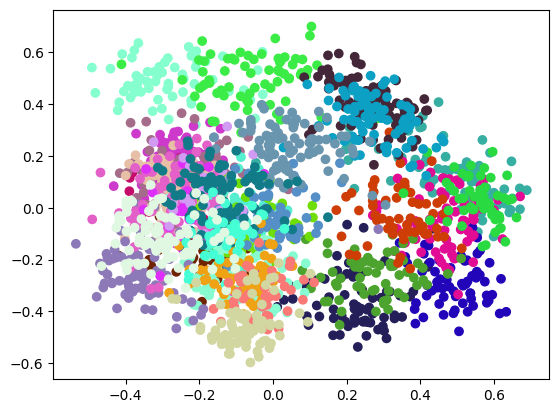

In [24]:
# Use PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=5)
embeddings_2d = pca.fit_transform(X_train)

# Map numeric labels to actual names
mapped_labels = [idx_to_class[label] for label in y_train]

# Define a function to assign colors to labels
def assign_colors(label):
    colors = {'Jessica Alba' : '#432638',
'Margot Robbie' : '#29da41',
'Hrithik Roshan' : '#8d79b8',
'Courtney Cox' : '#4ca42e',
'Akshay Kumar' : '#6e2400',
'Dwayne Johnson' : '#55eece',
'Tom Cruise' : '#45ffd5',
'Alia Bhatt' : '#84ffcd',
'Amitabh Bachchan' : '#c60c6a',
'Hugh Jackman' : '#e260c8',
'Robert Downey Jr' : '#117b88',
'Anushka Sharma' : '#a46c89',
'Natalie Portman' : '#0ca0c4',
'Charlize Theron' : '#2204b9',
'Andy Samberg' : '#cd39cb',
'Henry Cavill' : '#87fcd1',
'Marmik' : '#d29bf3',
'Camila Cabello' : '#3cec46',
'Ellen Degeneres' : '#6fdd06',
'Billie Eilish' : '#37aea2',
'Virat Kohli' : '#fa7876',
'Vijay Deverakonda' : '#e0f7e1',
'Alexandra Daddario' : '#241f59',
'Kashyap' : '#dd2ff9',
'Claire Holt' : '#e10c93',
'Zac Efron' : '#d2d6a0',
'Elizabeth Olsen' : '#cf3d06',
'Priyanka Chopra' : '#6a95ae',
'Brad Pitt' : '#e7bfa6',
'Lisa Kudrow' : '#548fc7',
'Roger Federer' : '#eea214'}
    return colors[label]

# Create color array for all points
colors = list(map(assign_colors, mapped_labels))

# Plot the 2D embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
plt.show()

## Face Recognition

The code performs face recognition on randomly selected images from the validation set. It predicts the labels for the images and displays the predicted and actual labels along with the image:

In [25]:

transform_img = transforms.Compose([transforms.Resize(1024)])
transform = transforms.Compose([
        transforms.Resize(1024),
        transforms.ToTensor()
    ])



dataset_val = datasets.ImageFolder(root="/content/val")
val_samples = dataset_val.samples


random_samples = random.choices(val_samples, k=5)

for img_path, true_label in random_samples:

    img_ = transform_img(Image.open(img_path).convert('RGB'))
    img = transform(Image.open(img_path).convert('RGB'))

    # Extract features
    _, embedding = extract_features(mtcnn, facenet, img)
    if embedding is None:
        print("Could not find face on {}".format(img_path))
        continue
    if embedding.shape[0] > 1:
        print("Multiple faces detected for {}, taking one with highest probability".format(img_path))
        embedding = embedding[0, :]


    predicted_label = clf.predict(embedding.reshape(1, -1))
    print(clf.predict_proba(embedding))

    predicted_class = idx_to_class[predicted_label[0]]
    true_class = idx_to_class[true_label]

    plt.imshow(img_)
    plt.title(f'Predicted: {predicted_class}, Actual: {true_class}')
    plt.axis('off')
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/val'

## Intruder Recognition

The code performs face recognition on a single image specified by img_path and displays the predicted label along with the image:

In [ ]:
img_path = '/kaggle/input/avengers-face-recognition/cropped_images/robert_downey_jr/robert_downey_jr13.png'

img_ = transform_img(Image.open(img_path).convert('RGB'))
img = transform(Image.open(img_path).convert('RGB'))
_, embedding = extract_features(mtcnn, facenet, img)

predicted_label = clf.predict(embedding.reshape(1, -1))
# Convert label indexes back to original classes
predicted_class = idx_to_class[predicted_label[0]]
true_class = idx_to_class[true_label]
print((clf.predict_proba(embedding)))
thres = 0.6
if np.max(clf.predict_proba(embedding)) < thres:
    predicted_class = 'Intruder'


plt.imshow(img_)
plt.title(f'Predicted: {predicted_class}, Actual: {"TomCruise"}')
plt.axis('off')
plt.show()

In [28]:
# Đường dẫn đến video
video_path = '/kaggle/input/endgame/AVENGERS- ENDGAME All Movie Clips - Final Battle (2019).mp4'
output_video_path = '/kaggle/working/output_video.mp4'

import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN, InceptionResnetV1
from tqdm import tqdm

# Tải model InceptionResnetV1 đã huấn luyện sẵn và lớp MTCNN
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=True, device=device)
facenet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Kiểm tra xem video có mở được không
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Không thể mở video")
    exit()

# Lấy tổng số khung hình để thiết lập thanh tiến độ
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Thiết lập video writer để lưu video đầu ra
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

# Tạo thanh tiến độ
pbar = tqdm(total=total_frames, desc="Processing video frames", position=0, leave=True)

# Đọc từng khung hình của video
for _ in range(total_frames):
    ret, frame = cap.read()
    if not ret:
        break

    # Chuyển từ BGR sang RGB vì OpenCV đọc ảnh theo BGR
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Phát hiện tất cả khuôn mặt trong khung hình
    boxes, _ = mtcnn.detect(frame_rgb)

    # Nếu phát hiện được ít nhất một khuôn mặt
    if boxes is not None:
        h, w, _ = frame.shape
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            x1, y1, x2, y2 = max(0, x1), max(0, y1), min(w, x2), min(h, y2)
            cropped_face = frame_rgb[y1:y2, x1:x2]

            # Bỏ qua nếu khuôn mặt không hợp lệ
            if cropped_face.size == 0:
                continue

            # Chuẩn bị khuôn mặt cho dự đoán
            face = cv2.resize(cropped_face, (160, 160))
            face = torch.tensor(face).permute(2, 0, 1).float().div(255).unsqueeze(0).to(device)

            # Tạo embedding và dự đoán danh tính
            with torch.no_grad():
                embedding = facenet(face).cpu().numpy()
                predicted_label = clf.predict(embedding.reshape(1, -1))
                predicted_class = idx_to_class[predicted_label[0]]
                
                # Lấy xác suất dự đoán
                probabilities = clf.predict_proba(embedding)
                max_prob = np.max(probabilities)

                # Nếu độ tin cậy thấp hơn ngưỡng, gán nhãn là "Intruder"
                if max_prob < 0.6:
                    predicted_class = 'Intruder'
                
                # Vẽ khung và nhãn trên hình ảnh
                label = f"{predicted_class} ({max_prob * 100:.1f}%)"
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Ghi khung hình đã xử lý vào video đầu ra
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

    # Cập nhật thanh tiến độ
    pbar.update(1)

# Đóng thanh tiến độ và giải phóng bộ nhớ
pbar.close()
cap.release()
out.release()
print("Video đã được xử lý và lưu thành công.")


Processing video frames: 100%|██████████| 12616/12616 [18:49<00:00, 11.17it/s]

Video đã được xử lý và lưu thành công.
